desifast: 133.69810937319517
interp  : -76.25450591115245

desifast: 5796167.818214517
back    : 5796168.07514361
interp1d: 5796060.207723856
int_back: 5795913.021624431
original: 5796225.0
3548.9646 5973.028


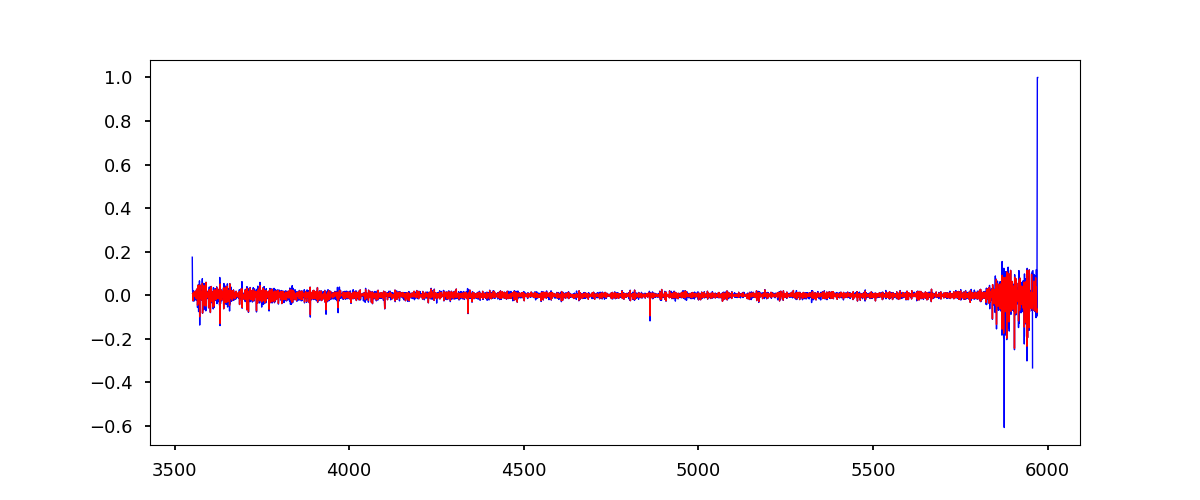

In [1]:
import numpy
import lvmdrp.core.resample as resample
from lvmdrp.core.rss import RSS, loadRSS
import matplotlib.pyplot as plt
from scipy import interpolate
from astropy.io import fits

def interpolate_mask(x, y, mask, kind="linear", fill_value=0):
    """
    :param x, y: numpy arrays, samples and values
    :param mask: boolean mask, True for masked values
    :param method: interpolation method, one of linear, nearest,
    nearest-up, zero, slinear, quadratic, cubic, previous, or next.
    :param fill_value: which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
    :return: the image with missing values interpolated
    """
    if not numpy.any(mask):
        return y
    known_x, known_v = x[~mask], y[~mask]
    missing_x = x[mask]
    missing_idx = numpy.where(mask)

    f = interpolate.interp1d(known_x, known_v, kind=kind, fill_value=fill_value, bounds_error=False)
    yy = y.copy()
    yy[missing_idx] = f(missing_x)

    return yy



# with fits.open("/Users/droryn/work/LVM/data/sas/sdsswork/lvm/spectro/redux/1.1.0dev/1039XX/1039949/60356/lvmCFrame-00012618.fits") as hdu:
#     s1 = hdu['FLUX'].data
#     d1 = hdu['IVAR'].data
#     w1 = hdu['WAVE'].data
f = 1022
f = 1513
# s1 = s1[f,:]
# d1 = d1[f,:]


rss = loadRSS("/Users/droryn/work/LVM/data/sas/sdsswork/lvm/spectro/redux/1.2.1dev/1039XX/1039949/60356/ancillary/lvm-wobject-b-00012618.fits")
s1 = rss._data[f,:]
w1 = rss._wave[f,:]

%matplotlib widget
fig = plt.figure(figsize=(12,5))
#plt.plot(w1, s1, color='red', linewidth=1)
#s1p = interpolate_mask(w1, s1, ~numpy.isfinite(s1))
s1p = s1
#w2 = numpy.logspace(numpy.log10(w1[1]), numpy.log10(w1[-1]), len(w1), endpoint=True)
w2 = numpy.arange(3549.0, 5970.0, 0.5)

# DESI cool histogram hack
s3 = resample.resample_flux_density(w2, w1, s1p, ivar=None)
s_back = resample.resample_flux_density(w1, w2, s3, ivar=None)
#plt.plot(w2, s3, color='cyan', linewidth=1)
#plt.plot(w1, s_back, color='blue', linewidth=1)
plt.plot(w1, (s1p-s_back)/s1p, color='blue', linewidth=1)

# interpolation
inter = interpolate.interp1d(w1, s1p)
s5 = inter(w2)
inter = interpolate.interp1d(w2, s5, bounds_error=0)
s5_back = inter(w1)
#plt.plot(w1, s5_back, color='green', linewidth=1)
plt.plot(w1, (s1p-s5_back)/s1p, color='red', linewidth=1)

print(f'desifast: {numpy.nansum((s1p-s_back)*numpy.gradient(w1))}\n'\
      f'interp  : {numpy.nansum((s1p-s5_back)*numpy.gradient(w1))}\n')

print(f'desifast: {numpy.nansum(s3*numpy.gradient(w2))}\n'\
      f'back    : {numpy.nansum(s_back*numpy.gradient(w1))}\n'\
      f'interp1d: {numpy.nansum(s5*numpy.gradient(w2))}\n'\
      f'int_back: {numpy.nansum(s5_back*numpy.gradient(w1))}\n'\
      f'original: {numpy.nansum(s1p*numpy.gradient(w1))}')
print(w1[0], w1[-1])

In [2]:
from astropy.table import Table
with fits.open("/Users/droryn/prog/lvm/lvmdrp/ckp00_6500.fits") as hdu:
    t = Table(hdu[1].data)
    w = t['WAVELENGTH']
    lvm = numpy.where((w>3600)*(w<9800))
    f = t['g40'][lvm]
    w = w[lvm]
plt.plot(w,f,linewidth=1)

[ERROR]: Traceback (most recent call last):
  File "/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/31/fxk1ql6s5bx7q3kh6kwpf8v8c5vp86/T/ipykernel_57956/2544147205.py", line 2, in <module>
    with fits.open("/Users/droryn/prog/lvm/lvmdrp/ckp00_6500.fits") as hdu:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/astropy/io/fits/hdu/hdulist.py", line 222, in fitsopen
    return HDUList.fromfile(
           ^^^^^^^^^^^^^^^^^
  File "/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/astropy/io/fits/hdu/hdulist.py", line 486, in fromfile
    return cls._readfrom(
           ^^^^^^^^^^^^^^
  File "/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/astropy/io/fits/hdu/hdulist.py", line 1169, in _readfrom
    fileobj = _File(
              ^^^^^^
  File "/opt/min

In [3]:
w1 = numpy.array([0,1,2,3,4,5,6,7,8,9])
w2 = (w1+0.5)
s1p = w2
s1p[5] = numpy.nan

s2 = resample.rebin_spectra(w2, w1, s1p, spec_errs=None, fill=0)

s3 = resample.resample_flux_density(w2, w1, s1p, ivar=None)

s4 = resample.resample_project(w2, w1, s1p, ivar=None)
print(s2,s3,s4)

[ERROR]: Traceback (most recent call last):
  File "/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/31/fxk1ql6s5bx7q3kh6kwpf8v8c5vp86/T/ipykernel_57956/2625632651.py", line 6, in <module>
    s2 = resample.rebin_spectra(w2, w1, s1p, spec_errs=None, fill=0)
         ^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'lvmdrp.core.resample' has no attribute 'rebin_spectra'



Alfredo's Test

[WARNING]: /Users/droryn/prog/lvm/lvmdrp/python/lvmdrp/core/spectrum1d.py:3812: UserWarning: masking line @ 5577.35 with >= 2 masked pixels within a 3.5 sigma window
  warnings.warn(f"masking line @ {centre:.2f} with >= 2 masked pixels within a 3.5 sigma window")

[WARNING]: /Users/droryn/prog/lvm/lvmdrp/python/lvmdrp/core/spectrum1d.py:3756: UserWarning: skipping line @ 5577.35 with 5 >= badpix_threshold = 4 bad pixels
  warnings.warn(f"skipping line @ {centre:.2f} with {mask[select].sum()} >= {badpix_threshold = } bad pixels")

[WARNING]: /Users/droryn/prog/lvm/lvmdrp/python/lvmdrp/core/spectrum1d.py:3756: UserWarning: skipping line @ 5577.35 with 4 >= badpix_threshold = 4 bad pixels
  warnings.warn(f"skipping line @ {centre:.2f} with {mask[select].sum()} >= {badpix_threshold = } bad pixels")

[WARNING]: /Users/droryn/prog/lvm/lvmdrp/python/lvmdrp/core/spectrum1d.py:3756: UserWarning: skipping line @ 5577.35 with 6 >= badpix_threshold = 4 bad pixels
  warnings.warn(f"skipping line @ 

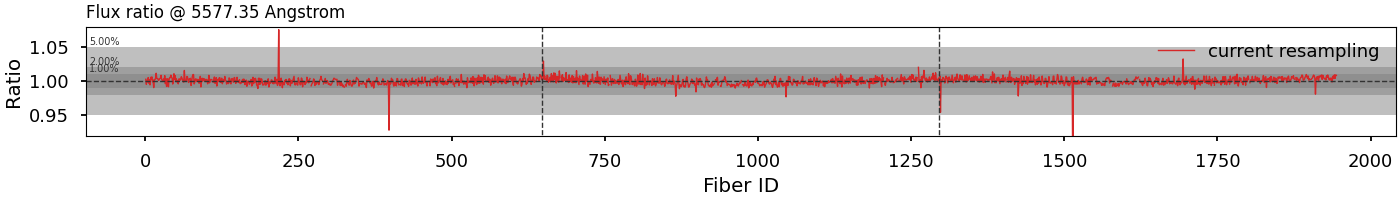

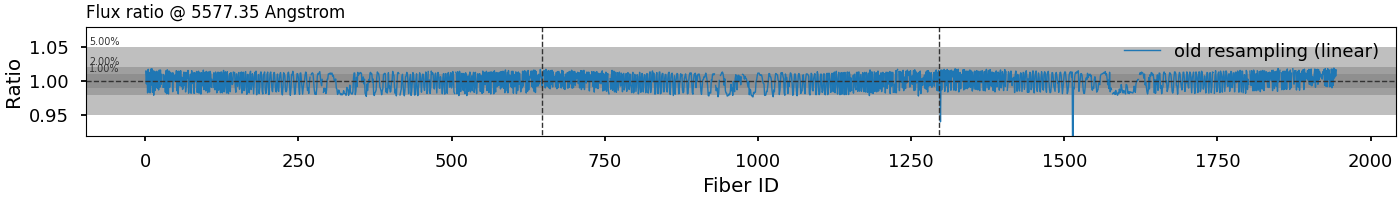

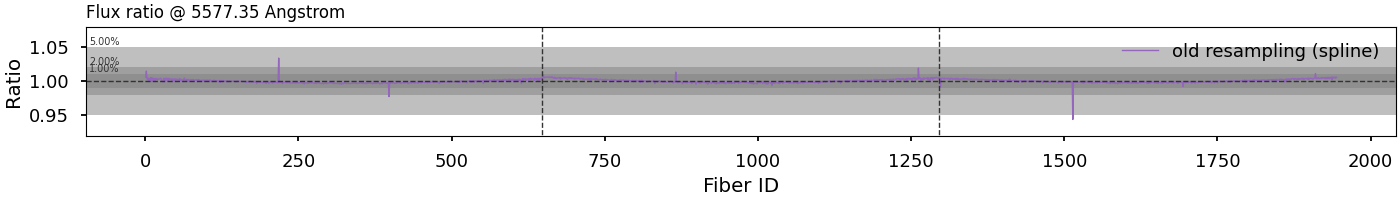

In [13]:
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload


from lvmdrp.core.constants import SPEC_CHANNELS, SKYLINES_FIBERFLAT
from lvmdrp.core import plot


from lvmdrp.core import rss

channel = "b"
for channel in "b":
    #wframe = rss.RSS.from_file(f"/Volumes/CUCHUFLI/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/1.1.2dev/1055XX/1055752/60578/ancillary/lvm-wobject-{channel}-00026297.fits")
    wframe = rss.RSS.from_file(f"/Users/droryn/work/LVM/data/sas/sdsswork/lvm/spectro/redux/1.2.1dev/1039XX/1039949/60356/ancillary/lvm-wobject-{channel}-00012618.fits")
    hframe_lin = wframe.rectify_wave(wave_range=SPEC_CHANNELS[channel], wave_disp=0.5, method="linear")
    hframe_spl = wframe.rectify_wave(wave_range=SPEC_CHANNELS[channel], wave_disp=0.5, method="spline")
    hframe_niv = wframe.rectify_wave_niv(wave_range=SPEC_CHANNELS[channel], wave_disp=0.5)
    wframe /= np.gradient(wframe._wave, axis=1)

    slitmap = wframe._slitmap
    fibers = slitmap["fiberid"] < 0
    fibers[::648] = True

    ncols = 3
    nrows = int(np.ceil(fibers.sum()/ncols))

    # fig_nat, axs_nat = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows), sharex=True, sharey=True)
    # axs_nat = axs_nat.ravel()
    # fig_nat.suptitle("Non-rectified", fontsize="xx-large")
    # fig_nat.supxlabel("Wavelength (Angstroms)", fontsize="large")
    # axs_nat[0].set_ylabel(f"Flux ({hframe_lin._header['BUNIT']})")

    # fig_lin, axs_lin = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows), sharex=True, sharey=True)
    # axs_lin = axs_lin.ravel()
    # fig_lin.suptitle("Rectified old resampling (linear)", fontsize="xx-large")
    # fig_lin.supxlabel("Wavelength (Angstroms)", fontsize="large")
    # axs_lin[0].set_ylabel(f"Flux ({hframe_lin._header['BUNIT']})")

    # fig_spl, axs_spl = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows), sharex=True, sharey=True)
    # axs_spl = axs_spl.ravel()
    # fig_spl.suptitle("Rectified old resampling (spline)", fontsize="xx-large")
    # fig_spl.supxlabel("Wavelength (Angstroms)", fontsize="large")
    # axs_spl[0].set_ylabel(f"Flux ({hframe_lin._header['BUNIT']})")

    # fig_niv, axs_niv = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows), sharex=True, sharey=True)
    # axs_niv = axs_niv.ravel()
    # fig_niv.suptitle("Rectified current resampling", fontsize="xx-large")
    # fig_niv.supxlabel("Wavelength (Angstroms)", fontsize="large")
    # axs_niv[0].set_ylabel(f"Flux ({hframe_lin._header['BUNIT']})")

    z_nat = wframe.fit_lines_slit(cwaves=SKYLINES_FIBERFLAT[channel], dwave=20)#, select_fibers=fibers, axs=axs_nat)
    z_lin = hframe_lin.fit_lines_slit(cwaves=SKYLINES_FIBERFLAT[channel], dwave=20)#, select_fibers=fibers, axs=axs_lin)
    z_spl = hframe_spl.fit_lines_slit(cwaves=SKYLINES_FIBERFLAT[channel], dwave=20)#, select_fibers=fibers, axs=axs_spl)
    z_niv = hframe_niv.fit_lines_slit(cwaves=SKYLINES_FIBERFLAT[channel], dwave=20)#, select_fibers=fibers, axs=axs_niv)
    # fig_nat.tight_layout()
    # fig_lin.tight_layout()
    # fig_spl.tight_layout()
    # fig_niv.tight_layout()

    _, ax = plt.subplots(figsize=(14,2), layout="constrained")
    plot.slit(x=slitmap["fiberid"].data, y=z_nat / z_niv, ax=ax, color="tab:red", label="current resampling")
    ax.legend(loc=1, frameon=False, ncols=5)
    ax.set_ylim(0.92, 1.08)
    ax.set_xlabel("Fiber ID")
    ax.set_ylabel("Ratio")
    ax.set_title(f"Flux ratio @ {SKYLINES_FIBERFLAT[channel]:.2f} Angstrom", loc="left", fontsize="large")

    _, ax = plt.subplots(figsize=(14,2), layout="constrained")
    plot.slit(x=slitmap["fiberid"].data, y=z_nat / z_lin, ax=ax, color="tab:blue", label="old resampling (linear)")
    ax.legend(loc=1, frameon=False, ncols=5)
    ax.set_ylim(0.92, 1.08)
    ax.set_xlabel("Fiber ID")
    ax.set_ylabel("Ratio")
    ax.set_title(f"Flux ratio @ {SKYLINES_FIBERFLAT[channel]:.2f} Angstrom", loc="left", fontsize="large")

    _, ax = plt.subplots(figsize=(14,2), layout="constrained")
    plot.slit(x=slitmap["fiberid"].data, y=z_nat / z_spl, ax=ax, color="tab:purple", label="old resampling (spline)")
    ax.legend(loc=1, frameon=False, ncols=5)
    ax.set_ylim(0.92, 1.08)
    ax.set_xlabel("Fiber ID")
    ax.set_ylabel("Ratio")
    ax.set_title(f"Flux ratio @ {SKYLINES_FIBERFLAT[channel]:.2f} Angstrom", loc="left", fontsize="large")


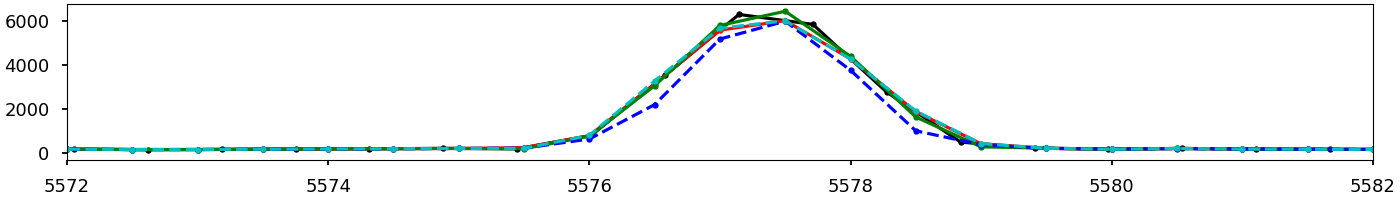

In [5]:
from lvmdrp.core.resample import Resample

%matplotlib widget
plt.cla()
fiber = 99
plt.plot(wframe._wave[fiber,:], wframe._data[fiber,:], 'k-')
plt.plot(wframe._wave[fiber,:], wframe._data[fiber,:], 'k.')
plt.plot(hframe_lin._wave[:], hframe_lin._data[fiber,:], 'r-')
plt.plot(hframe_lin._wave[:], hframe_lin._data[fiber,:], 'r.')
plt.plot(hframe_spl._wave[:], hframe_spl._data[fiber,:], 'g-')
plt.plot(hframe_spl._wave[:], hframe_spl._data[fiber,:], 'g.')
plt.plot(hframe_niv._wave[:], hframe_niv._data[fiber,:], 'b--')
plt.plot(hframe_niv._wave[:], hframe_niv._data[fiber,:], 'b.')

r = Resample(wframe._data[fiber,:], None, None, wframe._wave[fiber,:], newx=hframe_lin._wave[:])
plt.plot(r.outx, r.outy, 'c--')
plt.plot(r.outx, r.outy, 'c.')

plt.xlim(5572,5582)

plt.show()

In [11]:
from lvmdrp.core.resample import resample_flux, resample_flux_density, Resample
import matplotlib.pyplot as plt

%matplotlib widget
plt.cla()
w = numpy.linspace(5000,5100,101,endpoint=True)
w2 = numpy.linspace(5000,5100,121,endpoint=True)
f = 100
sigma = 1.51 / 2.35
w0 = 5050.34
s = f * 1./(numpy.sqrt(2*numpy.pi)*sigma) * numpy.exp(-0.5*((w-w0)/sigma)**2)

plt.plot(w, s, 'k-')
R = Resample(s, e=None, mask=None, x=w, newx=w2)
s2 = R.outy
plt.plot(w2, s2, 'r--')

s3 = resample_flux(w2, w, s)
plt.plot(w2, s3, 'g--')

plt.xlim(5040,5060)

(5040.0, 5060.0)

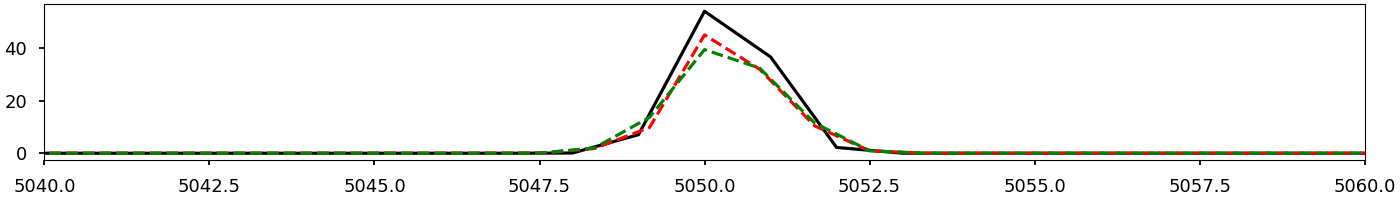

In [10]:
plt.show()
